In [2]:
import numpy as np
import sys
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
poverty_data = pd.read_csv("/Users/nasheyarahman/Desktop/Data Mining/Project Data/human-development/multidimensional_poverty.csv")
index_data = poverty_data[["Country", "Multidimensional Poverty Index (MPI, HDRO)"]]

hdi_data = pd.read_csv("/Users/nasheyarahman/Desktop/Data Mining/Project Data/human-development/human_development.csv")

In [4]:
poverty_data.dtypes

Country                                        object
Year and Survey                                object
Multidimensional Poverty Index (MPI, HDRO)    float64
MPI HDRO Percent                              float64
Multidimensional Poverty Index (MPI, 2010)    float64
MPI 2010 Percent                              float64
Population in Multidimensional Poverty         object
Intensity of Deprivation                      float64
Education Deprivation                         float64
Health Deprivation                            float64
Living Standards                              float64
Population Below National Poverty Line         object
Population Below $1.25 per Day                 object
dtype: object

In [5]:
CPIA_data = pd.read_csv("/Users/nasheyarahman/Desktop/Data Mining/Project Data/CPIA_csv/CPIAData.csv")
sc = CPIA_data.loc[CPIA_data["Indicator Name"]=="CPIA policies for social inclusion/equity cluster average (1=low to 6=high)"]
sc = sc.rename(columns={'Country Name': 'Country'})
sc.head()

,Country,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 15
10,IDA countries classified as fragile situations,DFS,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,2.800000,2.745455,2.763636,2.736364,2.783333,2.841667,2.873077,2.842857,2.820690,2.858621,2.865517,NaN
31,IDA countries classified as fragile situations...,FXS,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,2.833333,2.742857,2.742857,2.757143,2.875000,2.912500,2.820000,2.845455,2.808333,2.833333,2.808333,NaN
52,IDA countries in Sub-Saharan Africa classified...,DSF,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,2.786667,2.746667,2.773333,2.726667,2.737500,2.806250,2.906250,2.841176,2.829412,2.876471,2.905882,NaN
73,IDA countries in Sub-Saharan Africa not classi...,DNS,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,3.404762,3.400000,3.414286,3.414286,3.423810,3.457143,3.476190,3.500000,3.504762,3.504762,3.500000,NaN
94,IDA countries not classified as fragile situat...,DNF,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,3.477778,3.463043,3.482609,3.506383,3.508511,3.534043,3.546809,3.563830,3.561702,3.553191,3.540426,NaN


In [6]:
merged_data = index_data.merge(sc, on="Country", sort="true")
merged_data = merged_data.rename(columns={'Unnamed: 15': 'Most Recent SC Index'})
merged_data.head()

,Country,"Multidimensional Poverty Index (MPI, HDRO)",Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Most Recent SC Index
0,Afghanistan,0.293,AFG,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,NaN,2.3,2.3,2.5,2.6,2.6,2.7,2.7,2.6,2.6,2.6,NaN
1,Armenia,0.002,ARM,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,4.2,4.2,4.2,4.1,4.1,4.1,4.0,4.0,4.0,NaN,NaN,NaN
2,Bangladesh,0.237,BGD,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,3.6,3.6,3.6,3.6,3.6,3.6,3.4,3.4,3.5,3.6,3.5,NaN
3,Benin,0.343,BEN,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,3.2,3.2,3.3,3.3,3.3,3.4,3.4,3.4,3.4,3.4,3.4,NaN
4,Bhutan,0.128,BTN,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,4.2,4.1,4.1,4.0,4.0,4.1,4.0,4.0,4.0,4.0,4.0,NaN


In [7]:
for i in range(len(merged_data)):
    found = False
    year = 2015
    
    while(found == False and year != 2004):
        dataPoint = merged_data.loc[i,str(year)]
        if dataPoint != dataPoint:
            year = year - 1   
        else:
            found = True
            merged_data.loc[i,'Most Recent SC Index'] = dataPoint
            
    if year == 2004:
        merged_data.drop(i)
        
merged_data_HDI = merged_data.merge(hdi_data, on="Country", sort="true")

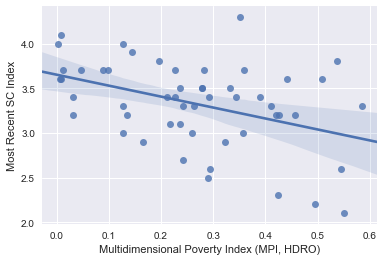

In [8]:
sns.regplot(x="Multidimensional Poverty Index (MPI, HDRO)", y="Most Recent SC Index", data=merged_data)

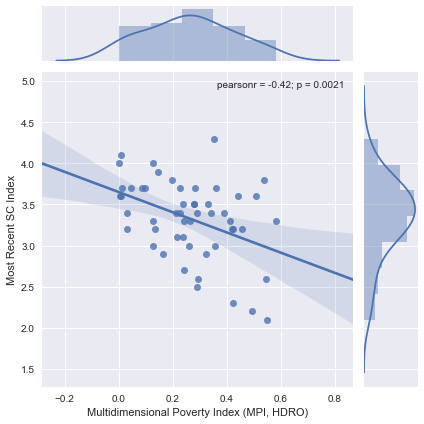

In [9]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] **2

sns.jointplot(x="Multidimensional Poverty Index (MPI, HDRO)", y="Most Recent SC Index", data=merged_data, kind="reg")

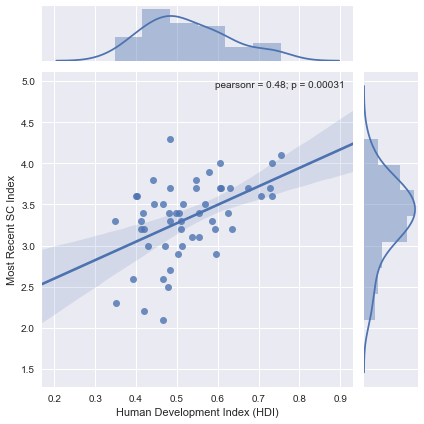

In [10]:
sns.jointplot(x="Human Development Index (HDI)", y="Most Recent SC Index", data=merged_data_HDI, kind="reg")

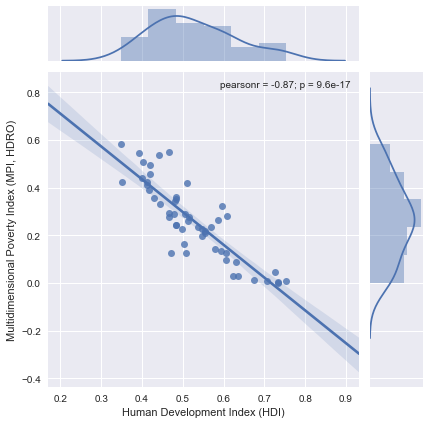

In [11]:
sns.jointplot(x="Human Development Index (HDI)", y="Multidimensional Poverty Index (MPI, HDRO)", data=merged_data_HDI, kind="reg")

In [12]:
import statsmodels.api as sm

x = [merged_data_HDI["Most Recent SC Index"], merged_data_HDI["Multidimensional Poverty Index (MPI, HDRO)"]]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print reg_m(merged_data_HDI["Human Development Index (HDI)"], x).summary()

                                  OLS Regression Results                                 
Dep. Variable:     Human Development Index (HDI)   R-squared:                       0.769
Model:                                       OLS   Adj. R-squared:                  0.759
Method:                            Least Squares   F-statistic:                     81.45
Date:                           Wed, 03 May 2017   Prob (F-statistic):           2.63e-16
Time:                                   19:09:50   Log-Likelihood:                 83.570
No. Observations:                             52   AIC:                            -161.1
Df Residuals:                                 49   BIC:                            -155.3
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------

In [13]:
sc.head()

,Country,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 15
10,IDA countries classified as fragile situations,DFS,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,2.800000,2.745455,2.763636,2.736364,2.783333,2.841667,2.873077,2.842857,2.820690,2.858621,2.865517,NaN
31,IDA countries classified as fragile situations...,FXS,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,2.833333,2.742857,2.742857,2.757143,2.875000,2.912500,2.820000,2.845455,2.808333,2.833333,2.808333,NaN
52,IDA countries in Sub-Saharan Africa classified...,DSF,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,2.786667,2.746667,2.773333,2.726667,2.737500,2.806250,2.906250,2.841176,2.829412,2.876471,2.905882,NaN
73,IDA countries in Sub-Saharan Africa not classi...,DNS,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,3.404762,3.400000,3.414286,3.414286,3.423810,3.457143,3.476190,3.500000,3.504762,3.504762,3.500000,NaN
94,IDA countries not classified as fragile situat...,DNF,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,3.477778,3.463043,3.482609,3.506383,3.508511,3.534043,3.546809,3.563830,3.561702,3.553191,3.540426,NaN


In [14]:
#leave one out technique -- see which one is the most important 

for index, row in sc.iterrows():
    found = False
    year = 2015
    
    while(found == False and year != 2004):
        dataPoint = row[str(year)]
        if dataPoint != dataPoint:
            year = year - 1   
        else:
            found = True
            sc.loc[index, 'Most Recent SC Index'] = dataPoint
            
    if year == 2004:
        sc.drop(index)

scHDI = hdi_data.merge(sc, on="Country", sort="true")

print scHDI

    HDI Rank                   Country  Human Development Index (HDI)  \
0      171.0               Afghanistan                          0.465   
1      149.0                    Angola                          0.532   
2       85.0                   Armenia                          0.733   
3      142.0                Bangladesh                          0.570   
4      166.0                     Benin                          0.480   
5      132.0                    Bhutan                          0.605   
6       85.0    Bosnia and Herzegovina                          0.733   
7      183.0              Burkina Faso                          0.402   
8      184.0                   Burundi                          0.400   
9      122.0                Cabo Verde                          0.646   
10     143.0                  Cambodia                          0.555   
11     153.0                  Cameroon                          0.512   
12     187.0  Central African Republic             

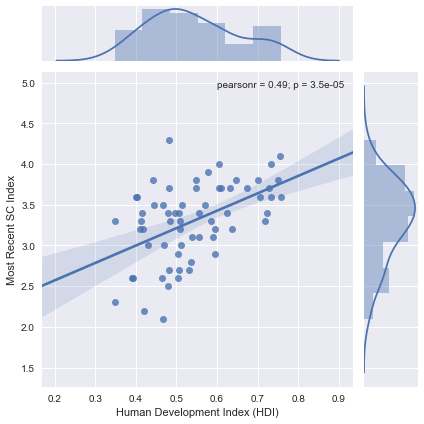

In [15]:
sns.jointplot(x="Human Development Index (HDI)", y="Most Recent SC Index", data=scHDI, kind="reg")